<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Цель:

1. При помощи анализа обработать данные.
2. Структурирование, коррекция и, если возможны, дополнения в данные.
3. Визуализация необходимых данных для выполнения задачи.
4. Сделать выводы, удовлетворяющие условию задач.

### Откройте файл с данными и изучите общую информацию. 

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
pd.set_option("display.float_format", "{:.2f}".format)
data = pd.read_csv('real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,...,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

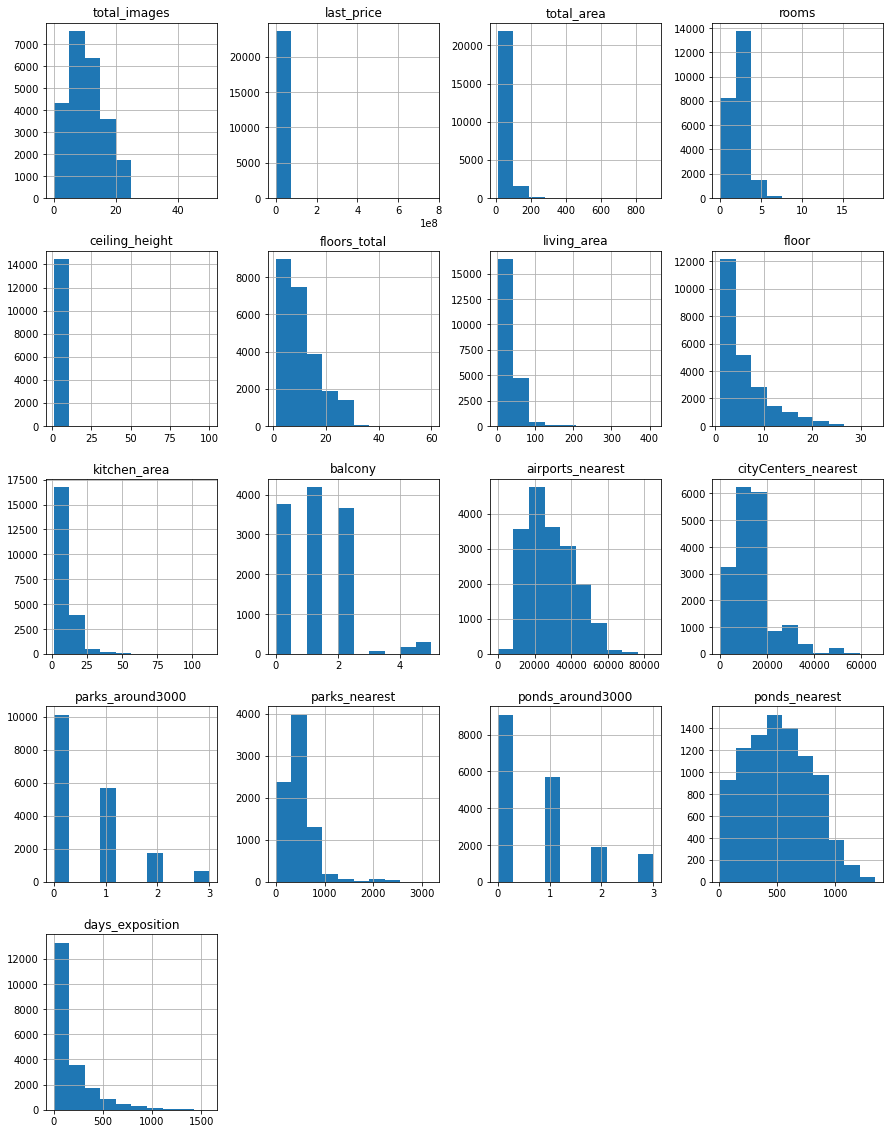

In [75]:
data.hist(figsize=(15, 20))

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


In [5]:
#Посмотрим пропуски в процентах
for col in data.columns:
    miss = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(miss*100)))

total_images - 0%
last_price - 0%
total_area - 0%
first_day_exposition - 0%
rooms - 0%
ceiling_height - 39%
floors_total - 0%
living_area - 8%
floor - 0%
is_apartment - 88%
studio - 0%
open_plan - 0%
kitchen_area - 10%
balcony - 49%
locality_name - 0%
airports_nearest - 23%
cityCenters_nearest - 23%
parks_around3000 - 23%
parks_nearest - 66%
ponds_around3000 - 23%
ponds_nearest - 62%
days_exposition - 13%


1. Следует заменить типы данных в:
    - <b>дата публикации</b> из string в datetime.


2. Пропущены значения в столбцах:
    - <b>высота потолков</b> (ceiling_height): отсутствует <b>38.79%</b> данных. 
    - <b>всего этажей в доме</b> (floors_total): отсутствует <b>0.36%</b> данных.
    - <b>жилая площадь в квадратных метрах (м²)</b> (living_area): отстутствует <b>8.02%</b> данных.
    - <b>апартаменты (булев тип)</b> (is_apartment): отсутствует <b>88.29%</b> данных.
    - <b>площадь кухни в квадратных метрах (м²)</b> (kitchen_area): отсутствует <b>9.61%</b> данных.
    - <b>число балконов</b> (balcony): отстутствует <b>48.60%</b> данных.
    - <b>название населённого пункта</b> (locality_name): отсутствует <b>0.2%</b> данных.
    - <b>расстояние до ближайшего аэропорта в метрах (м)</b> (airports_nearest): отсутствует <b>23.38%</b> данных.
    - <b>расстояние до центра города (м)</b> (cityCenters_nearest): отсуствует <b>23.28%</b> данных.
    - <b>число парков в радиусе 3 км</b> (parks_around3000): отсутствует <b>23.28%</b> данных.
    - <b>расстояние до ближайшего парка (м)</b> (parks_nearest): отсутствует <b>65.90%</b> данных.
    - <b>число водоёмов в радиусе 3 км</b> (ponds_around3000): отсутствует <b>23.28%</b> данных.
    - <b>расстояние до ближайшего водоёма (м)</b> (ponds_nearest): отсутствует <b>61.55%</b> данных.
    - <b>сколько дней было размещено объявление (от публикации до снятия)</b> (days_exposition): отсутствует <b>13.42%</b> данных.


3. Обнаружены аномальные данные:
    - <b>колличество комнат</b> (rooms): от 0 до 19
    - <b>высота потолков</b> (ceiling_height): от 1 до 100
       

4. Примерное понимание причин некоторых пропусков:
    - сразу бросается в глаза <b>is_apartment</b> с его рекордными пропусками данных. Изучив вопрос, можно сделать вывод, что данные отсутствуют потому что люди не понимают отличия между аппартаментами и другими видами недвижимости и пропускают этот пункт. (Квартира представляет собой отдельное жилое помещение в доме с одной или несколькими комнатами, кухней и отдельным санузлом. В то же время апартамент является комнатой или помещением для аренды или продажи. Акцентируем внимание, что во втором определении нет понятия «жилое». В этом и заключается главное отличие.)
    - <b>ceiling_height</b> возможно у людей либо нет рулетки, чтобы произвести замеры, либо они посчитали такую информацию не важным параметром.
    - <b>balcony</b> скорее всего данные отстутствуют потому что балкона нет.
    - <b>airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest</b> судя по всему были выгружены и присвоены автоматически, значит данные отсутствуют из-за какой то ошибки с геолокацией.
    - <b>days_exposition</b> вопрос опять к системе, которая вычисляет этот параметр. Возможно какой то bug, либо feature где висит объявление, например скрытие этого параметра.

<AxesSubplot:>

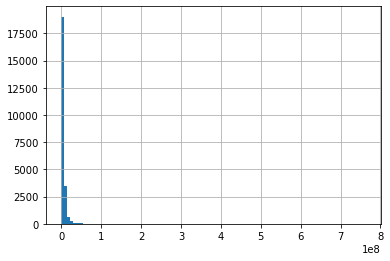

In [6]:
data['last_price'].hist(bins=100)
#Интересные показатели)))), будем смотреть дальше

<AxesSubplot:>

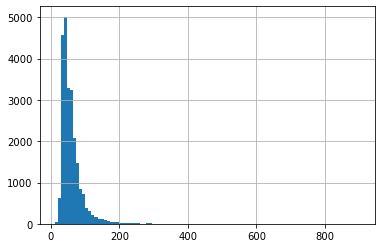

In [7]:
data['total_area'].hist(bins=100)
#Получше, но все равно ужас

<AxesSubplot:>

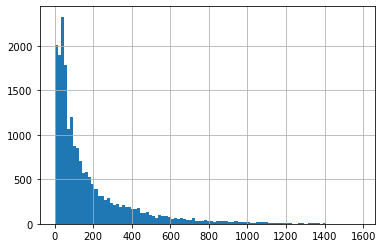

In [8]:
data['days_exposition'].hist(bins=100)
#мдеее...

### Предобработка данных

In [14]:
#Поменяем тип данных для удобства и корректности

#дополнение от меня из будущего: придется заполнить пустоты в столб с данными сколько висело объявление, медиана будет 45, 
#а мы удалим 45, жаль но что делать, может не исказит результат, посмотрим
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
data['days_exposition'] = data['days_exposition'].astype('int')

In [15]:
#Заполним пустоты в is_apartment, 
#предполагаю что люди, указавшие is_apartment = True специально регистрировали свою недвижимость именно так,
#остальные - обычные квартиры.
data['is_apartment'] = data['is_apartment'].fillna(False)

In [16]:
#Меняем тип данных со строки в datetime, отбросив ненужные часы, минуты и секунды (указаны одни нули)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [17]:
#Заполним пропуски в информации о балконах, меняем на более подходящий тип данных integer
data['balcony'] = data['balcony'].fillna(0).astype('int')

In [18]:
#Посмотрим что там городах
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [19]:
#Думаю где то в посЕлках и посЁлках неявные дубликаты!
data['locality_name'].value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

In [20]:
#Отсутствующие значения уже заполнены, поэтому поменяем на строку и поменяем все ё на е. (Кто вообще использует ё?)
data['locality_name'] = data['locality_name'].astype('str')
data['locality_name'] = [d.replace('ё', 'е') for d in data['locality_name']]
#Спасибо за наводку
delete = ['посёлок при железнодорожной станции', 'поселок городского типа','городской поселок', 'деревня', 'поселок', 'садовое товарищество', 'село']
data['locality_name'] = data['locality_name'].str.replace('|'.join(map(re.escape, delete)), '')

C:\Users\Stanley\AppData\Local\Temp\ipykernel_14384\3545592393.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['locality_name'] = data['locality_name'].str.replace('|'.join(map(re.escape, delete)), '')


In [21]:
#Ну и видим что уникальных значений стало меньше, дело сделано не зря (надеюсь)
data['locality_name'].value_counts()

Санкт-Петербург    15721
 Мурино              556
 Шушары              440
Всеволожск           398
Пушкин               369
                   ...  
 Алексеевка            1
 Белоостров            1
 Пельгора              1
 Каложицы              1
 Дзержинского          1
Name: locality_name, Length: 314, dtype: int64

### Посчитайте и добавьте в таблицу новые столбцы

In [22]:
#цена квадратного метра
data['price_for_square_meter'] = data['last_price'] / data['total_area']
#день недели, месяц и год публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
#внесем немного ясности и переведем с питоновского на человечий
weekdays = {0:'Понедельник', 
            1:'Вторник', 
            2:'Среда', 
            3:'Четверг', 
            4:'Пятница', 
            5:'Суббота', 
            6:'Воскресение'
           }
data['normal_weekday_exposition'] = data['weekday_exposition'].map(weekdays)
data['month_exposition'] = data['first_day_exposition'].dt.month
#data['month_exposition'] = data['first_day_exposition'].astype('datetime64[M]')
data['year_exposition'] = data['first_day_exposition'].dt.year
#этаж квартиры; варианты — первый, последний, другой
def floor_categorize(row):
    total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == total:
        return 'последний'
    else:
        return 'другой'
data['floor_category'] = data.apply(floor_categorize, axis = 1)
#соотношение жилой и общей площади, а также отношение площади кухни к общей
data['living_area_ratio'] = data['living_area'] / data['total_area']
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']
#закинем расстояние до центра города в километрах
data['cityCenters_nearest_in_km'] = data['cityCenters_nearest'] / 1000 

In [23]:
#data['month_exposition'].value_counts()

### Проведите исследовательский анализ данных

In [24]:
#для начала создадим функцию определяющую нормальность, границы "усов"
def define_whiskers(column):
    stat = data[column].describe()
    quartiles_range = stat[6] - stat[4]
    lwhisker = round(stat[4] - 1.5 * quartiles_range, 2)
    rwhisker = round(stat[6] + 1.5 * quartiles_range, 2)
    if lwhisker < stat[3]: 
        lwhisker = stat[3]
    if rwhisker < stat[3]: 
        rwhisker = stat[3]
    return [lwhisker, rwhisker]

<b>Общая площадь</b>

In [25]:
define_whiskers('total_area')

[12.0, 114.75]

count   23699.00
mean       60.35
std        35.65
min        12.00
25%        40.00
50%        52.00
75%        69.90
max       900.00
Name: total_area, dtype: float64

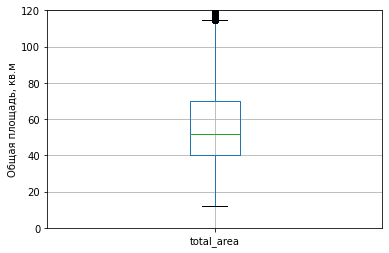

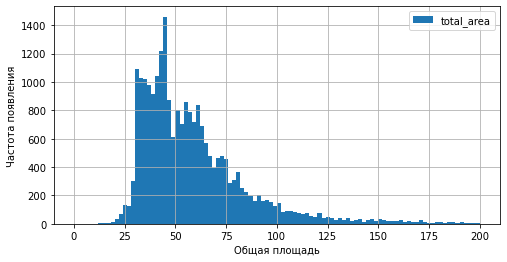

In [26]:
data.boxplot(column='total_area')
plt.ylim(0, 120)
plt.ylabel('Общая площадь, кв.м')


ax = data.plot(y='total_area', kind = 'hist', bins = 100, grid=True, figsize = (8,4), range = (0,200))
ax.set_xlabel('Общая площадь')
ax.set_ylabel('Частота появления')

#Добавим столбец по аномальным данным в датафрейм
data['too_large_area'] = data['total_area'] > define_whiskers('total_area')[1]

data['total_area'].describe()

<b>Средняя квартира выставленная на продажу имеет площадь 52 кв м.

Квартиры площадью больше чем 114.75 можно считать выбросами.</b>

<b>Жилая площадь</b>

In [27]:
define_whiskers('living_area')

[2.0, 77.85]

count   21796.00
mean       34.46
std        22.03
min         2.00
25%        18.60
50%        30.00
75%        42.30
max       409.70
Name: living_area, dtype: float64

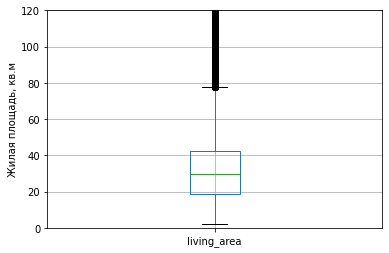

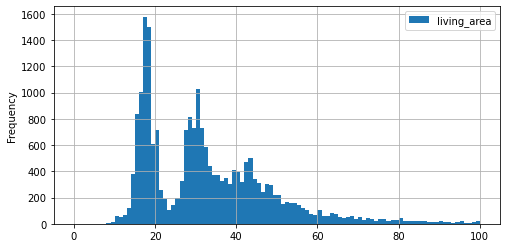

In [28]:
data.boxplot(column='living_area')
plt.ylim(0, 120)
plt.ylabel('Жилая площадь, кв.м')

data.plot(y='living_area', kind = 'hist', bins = 100, grid=True, figsize = (8,4), range = (0,100))
ax.set_xlabel('Жилая площадь')
ax.set_ylabel('Частота появления')

#Добавим столбец по аномальным данным в датафрейм
data['too_large_living'] = data['living_area'] > define_whiskers('living_area')[1]

data['living_area'].describe()

<b>Средняя квартира выставленная на продажу имеет жилую площадь 30 кв м.

Квартиры с жилой площадью больше чем 77.85 можно считать выбросами.</b>

<AxesSubplot:xlabel='rooms'>

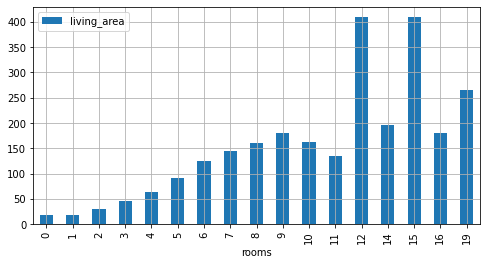

In [29]:
data.pivot_table(index='rooms', values='living_area', aggfunc='median').plot(y='living_area', kind = 'bar', grid=True, figsize = (8,4))

In [30]:
data['living_area'].value_counts().head(5)

18.00    882
17.00    675
30.00    598
16.00    486
20.00    481
Name: living_area, dtype: int64

<AxesSubplot:ylabel='Frequency'>

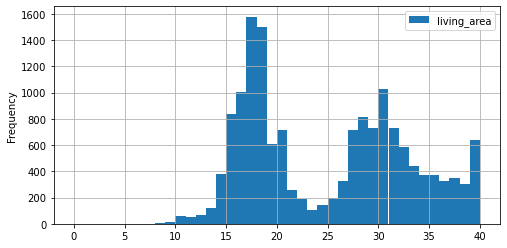

In [31]:
data.plot(y='living_area', kind = 'hist', bins = 40, grid=True, figsize = (8,4), range = (0,40))

<b>Больше всего квартир с жилой площадью от 16 до 20 кв. м. </b>

<b>Площадь кухни</b>

In [32]:
define_whiskers('kitchen_area')

[1.3, 19.5]

count   21421.00
mean       10.57
std         5.91
min         1.30
25%         7.00
50%         9.10
75%        12.00
max       112.00
Name: kitchen_area, dtype: float64

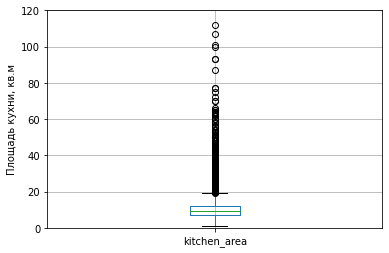

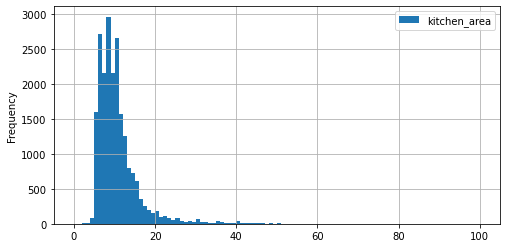

In [33]:
data.boxplot(column='kitchen_area')
plt.ylim(0, 120)
plt.ylabel('Площадь кухни, кв.м')

data.plot(y='kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (8,4), range = (0,100))
ax.set_xlabel('Площадь кухни')
ax.set_ylabel('Частота появления')

#Добавим столбец по аномальным данным в датафрейм
data['too_large_kitchen'] = data['kitchen_area'] > define_whiskers('kitchen_area')[1]

data['kitchen_area'].describe()

<b>Средняя квартира выставленная на продажу имеет площадь кухни 9.1 кв м.

Квартиры с площадью кухни больше чем 20 кв. м. можно считать выбросами.</b>

(башня Саурона или крепость из кастльвании))

In [34]:
#Точно!
data['area_paradox'] = data['kitchen_area'] + data['living_area'] > data['total_area']

<b>Цена объекта</b>

In [35]:
define_whiskers('last_price')

[12190.0, 11900000.0]

count       23699.00
mean      6541548.77
std      10887013.27
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

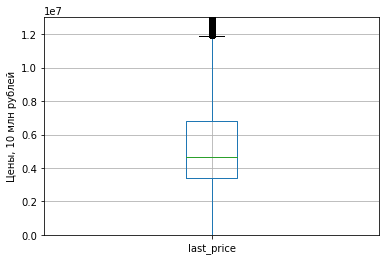

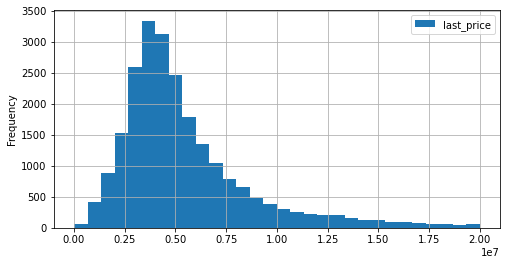

In [36]:
data.boxplot(column='last_price')
plt.ylim(0, 13000000)
plt.ylabel('Цены, 10 млн рублей')

data.plot(y='last_price', kind = 'hist', bins = 30, grid=True, figsize = (8,4), range = (0,20000000))
ax.set_xlabel('Цена')
ax.set_ylabel('Частота появления')


data['too_expensive'] = data['last_price'] > define_whiskers('last_price')[1]

data['last_price'].describe()

<b>Средняя квартира выставленная на продажу стоит 4650000 рублей.

Квартиры стоимостью выше 11900000 можно считать выбросами.</b>

<b>Количество комнат</b>

In [37]:
define_whiskers('rooms')

[0.0, 6.0]

count   23699.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

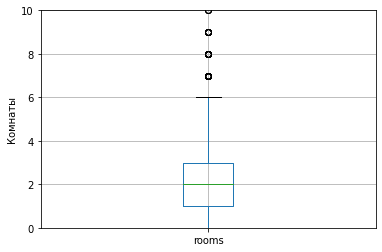

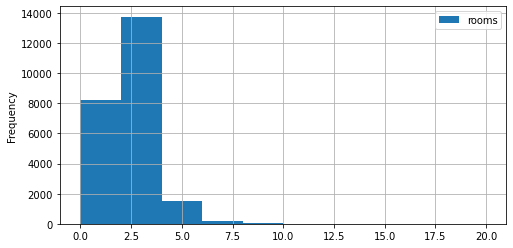

In [38]:
data.boxplot(column='rooms')
plt.ylim(0, 10)
plt.ylabel('Комнаты')

data.plot(y='rooms', kind = 'hist', bins = 10, grid=True, figsize = (8,4), range = (0,20))
ax.set_xlabel('Количество комнат')
ax.set_ylabel('Частота появления')

data['too_many_rooms'] = data['rooms'] > define_whiskers('rooms')[1]

data['rooms'].describe()

<b>Средняя квартира выставленная на продажу имеет 2 комнаты.

Квартиры с колличеством комнат больше 6 можно считать выбросами.</b>

<b>Высота потолков</b>

In [39]:
define_whiskers('ceiling_height')

[2.1, 3.22]

count   14504.00
mean        2.77
std         1.26
min         1.00
25%         2.52
50%         2.65
75%         2.80
max       100.00
Name: ceiling_height, dtype: float64

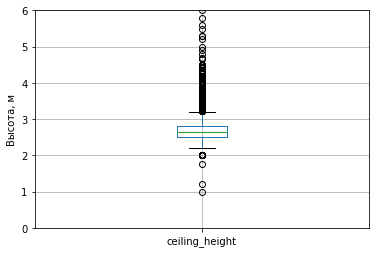

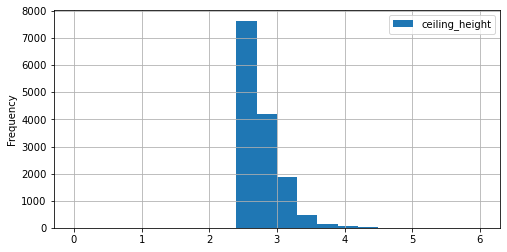

In [40]:
data.boxplot(column='ceiling_height')
plt.ylim(0, 6)
plt.ylabel('Высота, м')

data.plot(y='ceiling_height', kind = 'hist', bins = 20, grid=True, figsize = (8,4), range = (0,6))
ax.set_xlabel('Высота потолков')
ax.set_ylabel('Частота появления')

data['too_ceiling_high'] = data['ceiling_height'] > define_whiskers('ceiling_height')[1]
data['too_ceiling_low'] = data['ceiling_height'] < 2.5

data['ceiling_height'].describe()

<b>Средняя квартира выставленная на продажу имеет потолки высотой 2.65 м.

Квартиры с высотой потолков больше 3.22 и меньше 2.1 можно считать выбросами.</b>

<b>Этаж квартиры</b>

In [41]:
define_whiskers('floor')

[1.0, 17.0]

count   23699.00
mean        5.89
std         4.89
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        33.00
Name: floor, dtype: float64

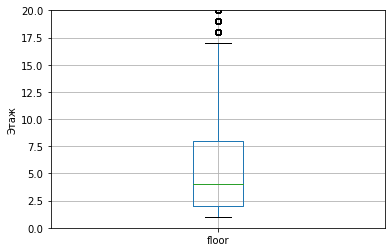

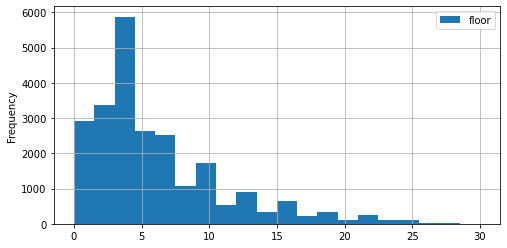

In [42]:
data.boxplot(column='floor')
plt.ylim(0, 20)
plt.ylabel('Этаж')

data.plot(y='floor', kind = 'hist', bins = 20, grid=True, figsize = (8,4), range = (0,30))
ax.set_xlabel('Этаж')
ax.set_ylabel('Частота появления')

data['too_floor_high'] = data['floor'] > define_whiskers('floor')[1]

data['floor'].describe()

<b>Средняя квартира выставленная на продажу находится на 4 этаже.

Квартиры с выше 17 этажа можно считать выбросами.</b>

<b>Тип этажа квартиры («первый», «последний», «другой»)</b>

(Какой вообще смысл описывать этот параметр если описали этажи? Да это тем более категории.)
Понятно что основная масса квартир будет находится в категории "другой", а "первый" больше чем "последний".

In [43]:
data['floor_category'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_category, dtype: int64

<b>Общее количество этажей в доме</b>

In [44]:
define_whiskers('floors_total')

[1.0, 32.5]

count   23613.00
mean       10.67
std         6.60
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

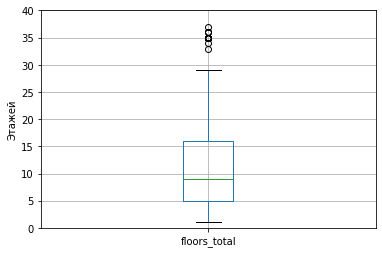

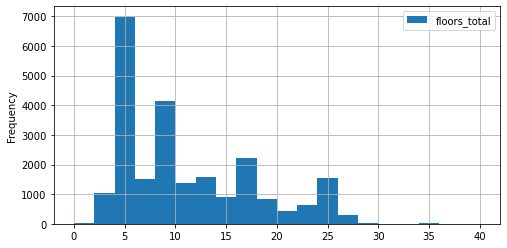

In [45]:
data.boxplot(column='floors_total')
plt.ylim(0, 40)
plt.ylabel('Этажей')

data.plot(y='floors_total', kind = 'hist', bins = 20, grid=True, figsize = (8,4), range = (0,40))
ax.set_xlabel('Всего этажей')
ax.set_ylabel('Частота появления')

data['too_many_floors'] = data['floors_total'] > define_whiskers('floors_total')[1]

data['floors_total'].describe()

<b>Средняя квартира выставленная на продажу находится в 9 этажном доме.

Квартиры в домах где больше 33 этажей можно считать выбросами.</b>

<b>Расстояние до центра города в метрах</b>

In [46]:
define_whiskers('cityCenters_nearest')

[181.0, 26875.5]

count   18180.00
mean    14191.28
std      8608.39
min       181.00
25%      9238.00
50%     13098.50
75%     16293.00
max     65968.00
Name: cityCenters_nearest, dtype: float64

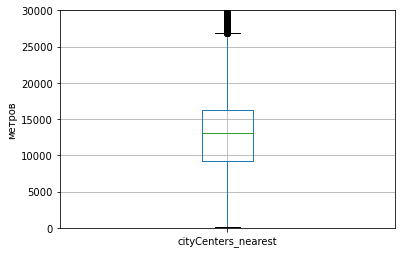

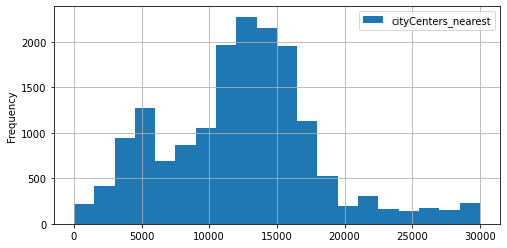

In [47]:
data.boxplot(column='cityCenters_nearest')
plt.ylim(0, 30000)
plt.ylabel('метров')

data.plot(y='cityCenters_nearest', kind = 'hist', bins = 20, grid=True, figsize = (8,4), range = (0,30000))
ax.set_xlabel('Расстояние до центра, м')
ax.set_ylabel('Частота появления')

data['cityCenters_nearest'].describe()

<b>Средняя квартира выставленная на продажу находится в 13098.50 м от центра города.</b>

<b>Расстояние до ближайшего аэропорта</b>

In [48]:
define_whiskers('airports_nearest')

[0.0, 65305.0]

count   18157.00
mean    28793.67
std     12630.88
min         0.00
25%     18585.00
50%     26726.00
75%     37273.00
max     84869.00
Name: airports_nearest, dtype: float64

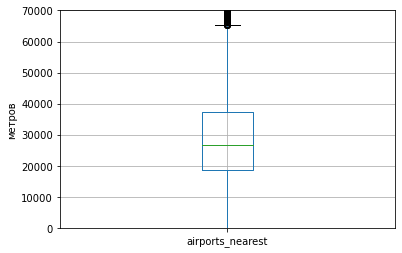

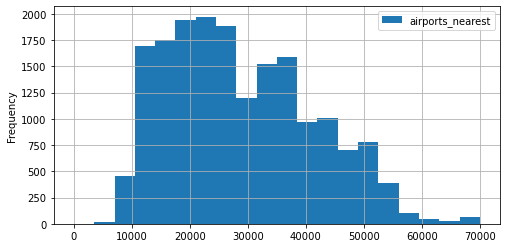

In [49]:
data.boxplot(column='airports_nearest')
plt.ylim(0, 70000)
plt.ylabel('метров')

data.plot(y='airports_nearest', kind = 'hist', bins = 20, grid=True, figsize = (8,4), range = (0,70000))
ax.set_xlabel('Растояние до аэропорта, м')
ax.set_ylabel('Частота появления')

data['airports_nearest'].describe()

<b>Средняя квартира выставленная на продажу находится в 26726 м от аэропорта.</b>

<b>Расстояние до ближайшего парка</b>

In [50]:
define_whiskers('parks_nearest')

[1.0, 1098.0]

count   8079.00
mean     490.80
std      342.32
min        1.00
25%      288.00
50%      455.00
75%      612.00
max     3190.00
Name: parks_nearest, dtype: float64

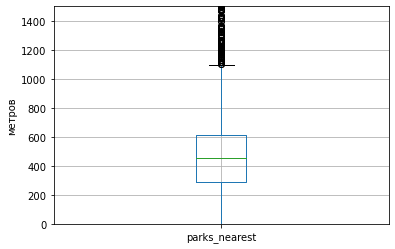

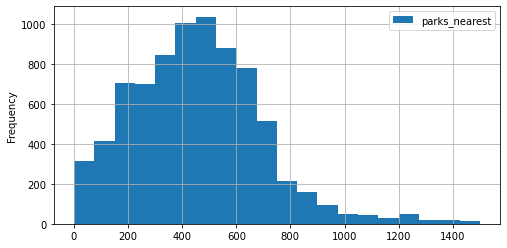

In [51]:
data.boxplot(column='parks_nearest')
plt.ylim(0, 1500)
plt.ylabel('метров')

data.plot(y='parks_nearest', kind = 'hist', bins = 20, grid=True, figsize = (8,4), range = (0,1500))
ax.set_xlabel('Растояние до парка, м')
ax.set_ylabel('Частота появления')

data['parks_nearest'].describe()

<b>Средняя квартира выставленная на продажу находится в 455 м от ближайшего парка.</b>

<b>День и месяц публикации объявления</b>

count   23699.00
mean        6.40
std         3.49
min         1.00
25%         3.00
50%         6.00
75%        10.00
max        12.00
Name: month_exposition, dtype: float64

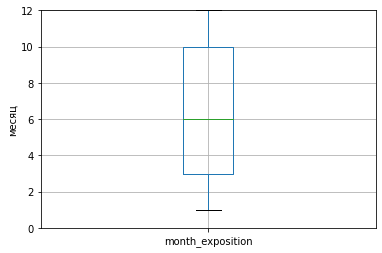

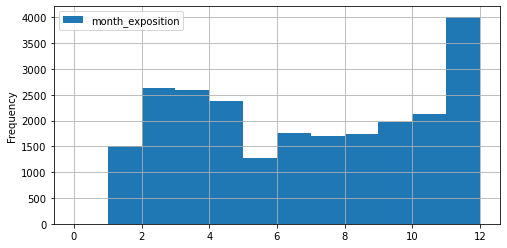

In [52]:
data.boxplot(column='month_exposition')
plt.ylim(0, 12)
plt.ylabel('месяц')

data.plot(y='month_exposition', kind = 'hist', bins = 12, grid=True, figsize = (8,4), range = (0,12))
ax.set_xlabel('Месяц размещения объявления')
ax.set_ylabel('Частота появления')

data['month_exposition'].describe()

<b>Чаще всего квартиры выставляют на продажу либо зимой, либо менее охотно весной, летом идет спад.</b>

count   23699.00
mean        2.57
std         1.79
min         0.00
25%         1.00
50%         3.00
75%         4.00
max         6.00
Name: weekday_exposition, dtype: float64

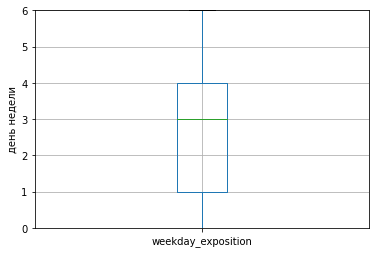

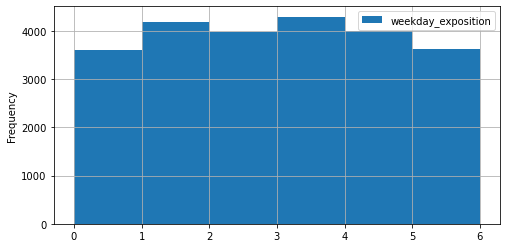

In [53]:
data.boxplot(column='weekday_exposition')
plt.ylim(0, 6)
plt.ylabel('день недели')

data.plot(y='weekday_exposition', kind = 'hist', bins = 6, grid=True, figsize = (8,4), range = (0,6))
ax.set_xlabel('День недели размещения объявления')
ax.set_ylabel('Частота появления')

data['weekday_exposition'].describe()

<b>Есть некая тенденция к тому что к середине недели продать квартиру хотят больше.</b>

Возможно работа агенств недвижимости в рабочие дни.

<b>Проанализировав данные можем сделать некоторые выводы:

Средняя квартира выставленная на продажу обладает следующими характеристиками: </b>

- Средняя квартира выставленная на продажу имеет площадь 52 кв м.

- Средняя квартира выставленная на продажу имеет жилую площадь 30 кв м.

- Средняя квартира выставленная на продажу имеет площадь кухни 9.1 кв м.

- Средняя квартира выставленная на продажу стоит 4650000 рублей.

- Средняя квартира выставленная на продажу имеет 2 комнаты.

- Средняя квартира выставленная на продажу имеет потолки высотой 2.65 м.

- Средняя квартира выставленная на продажу находится на 4 этаже.

- Средняя квартира выставленная на продажу находится в 9 этажном доме.

- Средняя квартира выставленная на продажу находится в 13098.50 м от центра города.

- Средняя квартира выставленная на продажу находится в 26726 м от аэропорта.

- Средняя квартира выставленная на продажу находится в 455 м от ближайшего парка.

Так же:

- Чаще всего квартиры выставляют на продажу либо зимой, либо менее охотно весной, летом идет спад.

- Есть некая тенденция к тому что к середине недели продать квартиру хотят больше.

<b>Изучите, как быстро продавались квартиры (столбец days_exposition).</b>

In [54]:
define_whiskers('days_exposition')

[1.0, 430.0]

count   23699.00
mean      169.36
std       206.54
min         1.00
25%        45.00
50%        95.00
75%       199.00
max      1580.00
Name: days_exposition, dtype: float64

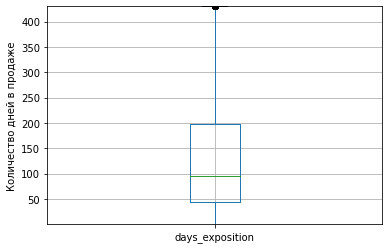

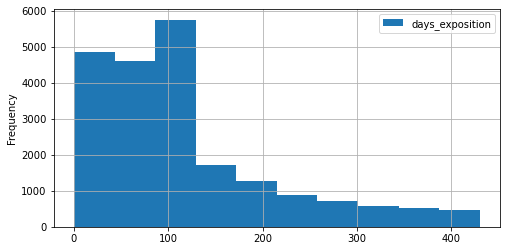

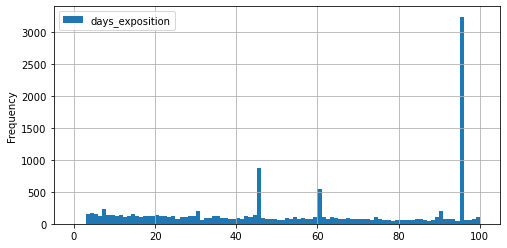

In [55]:
data.boxplot(column='days_exposition')
plt.ylim(1, 430)
plt.ylabel('Количество дней в продаже')

data.plot(y='days_exposition', kind = 'hist', grid=True, figsize = (8,4), range = (0,430))
data.plot(y='days_exposition', kind = 'hist', grid=True, bins=100, figsize = (8,4), range = (0,100))


#пометим аномальные значения
data['too_slow'] = data['days_exposition'] > define_whiskers('days_exposition')[1]

data['days_exposition'].describe()

Обычно квартиры продаются в срок 95 дней.

Квартиры продают в диапозоне от 1 дня до 430 дней. Будем считать это нормой продаж.

Хьюстон, у нас аномалия, срочно требуется удаление!

7, 30, 45, 60, 90, 95 дней показывают аномальные пики, исходя из моих личных наблюдений по другим ресурсам продаж недвижимости
(в моем случае более "родным" считается farpost.ru)
могу выдвинуть гипотезу:
Есть какие то сроки на сайте, которые предлагают пользователю бесплатное размещение объявления на какой то срок, по окончанию которого объявление "снимается" с торгов, или публичного просмотра, если пользователь не оплатит дополнительное время.

Диапозон аномалий скорее всего зависит от каких то факторов, возможно зависит от региона или города, цены, тип личного кабинета (например выставляли как агенство или частник), каких либо промо акций.

Загуглив "Условия размещения объявлении Yandex недвижимость" нашел FAQ, но страницу для физических лиц невозможно открыть, а для "юриков" ничего интересного не нашел. 

In [56]:
#Чистим датафрейм 
good_data = data.query('days_exposition != 45 and days_exposition != 60 and days_exposition != 90 and days_exposition != 95 and days_exposition != 7 and days_exposition != 30')

count   18390.00
mean      196.15
std       227.08
min         1.00
25%        44.00
50%       114.00
75%       259.00
max      1580.00
Name: days_exposition, dtype: float64

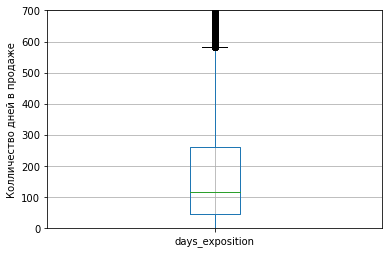

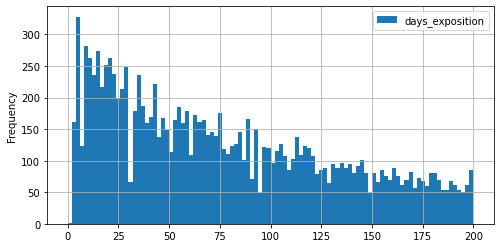

In [57]:
good_data.boxplot(column='days_exposition')
plt.ylim(0, 700)
plt.ylabel('Колличество дней в продаже')
good_data.plot(y='days_exposition', kind = 'hist', grid=True, bins=100, figsize = (8,4), range = (0, 200))

good_data['days_exposition'].describe()

Если верить графикам, обычно продажа может длиться от 1 до ~550 дней, в среднем через 114 дней квартиру продают, что наверное является весьма приземленым значением, исходя из моего опыта.

In [58]:
#Уберем все значения что посчитали выбросами
good_data = data[(data['too_large_area'] == False) &
     (data['too_large_living'] == False) &
     (data['too_large_kitchen'] == False) &
     (data['too_expensive'] == False) &
     (data['too_many_rooms'] == False) &
     (data['too_ceiling_high'] == False) &
     (data['too_ceiling_low'] == False) &
     (data['too_floor_high'] == False) &            
     (data['area_paradox'] == False) &
     (data['too_slow'] == False)].reset_index(drop=True)
#Посмотрим сколько данных осталось после мойки датафрейма в %
display(len(good_data) / len(data) * 100)

75.70361618633697

In [59]:
#Уберем уже не нужные столбцы 
good_data = good_data.drop(columns = ['too_large_area', 'too_large_living', 'too_large_kitchen', 'too_expensive', 'too_many_rooms',
                         'too_ceiling_high', 'too_ceiling_low', 'too_floor_high', 'too_slow', 'too_many_floors', 'area_paradox' ],axis = 1)

<b>"Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."</b>

In [60]:
good_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_for_square_meter,weekday_exposition,normal_weekday_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio,cityCenters_nearest_in_km
0,7,3350000.00,40.40,2018-12-04,1,NaN,11.00,18.60,1,False,...,81,82920.79,1,Вторник,12,2018,первый,0.46,0.27,18.60
1,10,2890000.00,30.40,2018-09-10,1,NaN,12.00,14.40,5,False,...,55,95065.79,0,Понедельник,9,2018,другой,0.47,0.30,NaN
2,6,3700000.00,37.30,2017-11-02,1,NaN,26.00,10.60,6,False,...,155,99195.71,3,Четверг,11,2017,другой,0.28,0.39,19.14
3,18,5400000.00,61.00,2017-02-26,3,2.50,9.00,43.60,7,False,...,289,88524.59,6,Воскресение,2,2017,другой,0.71,0.11,15.01
4,5,5050000.00,39.60,2017-11-16,1,2.67,12.00,20.30,3,False,...,137,127525.25,3,Четверг,11,2017,другой,0.51,0.21,13.88


<b>Влияние общей площади на цену </b>

In [61]:
#создадим функцию для визуализации
def get_stats(area):
    pivot_area = good_data.pivot_table(index = area, values = ['last_price', 'price_for_square_meter'], aggfunc =['mean', 'count', 'median'])

    return (good_data[area].corr(good_data['last_price']),
            good_data[area].corr(good_data['price_for_square_meter']),
            pivot_area.plot(y = 'median', style = 'o', alpha = 0.2))

(0.6798988254343934, -0.08636890882936817, <AxesSubplot:xlabel='total_area'>)

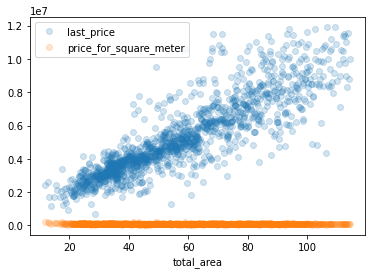

In [62]:
get_stats('total_area')

Общая площадь конечно же влияет на итоговую цену объекта, логично - чем больше - тем дороже.
А вот с ценой за квадратный метр дела обстоят иначе, зависимости нет.

<b>Влияние жилой площади на цену</b>

(0.5651599082698329, -0.17082369859024607, <AxesSubplot:xlabel='living_area'>)

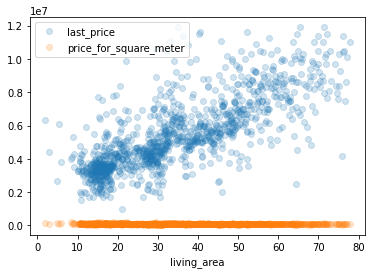

In [63]:
get_stats('living_area')

Примерно похожая картина, что и в общей площади

<b>Влияние площади кухни на цену</b>

(0.4685607591115625, 0.22864983875824493, <AxesSubplot:xlabel='kitchen_area'>)

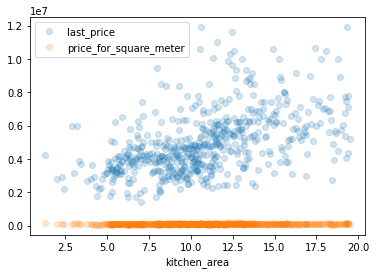

In [64]:
get_stats('kitchen_area')

Еще более смазано, но хотя бы цена на метр немного пошатнулась

<b>Влияние других факторов</b>
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год)

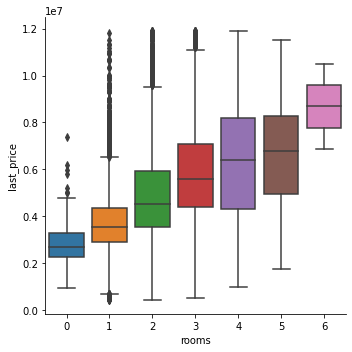

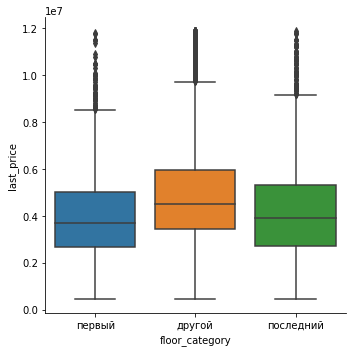

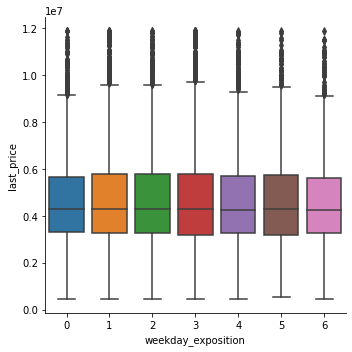

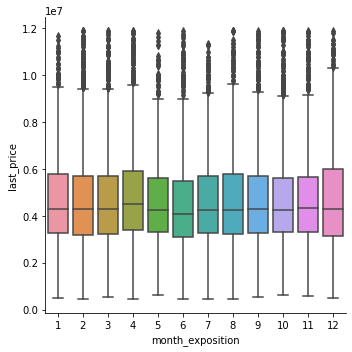

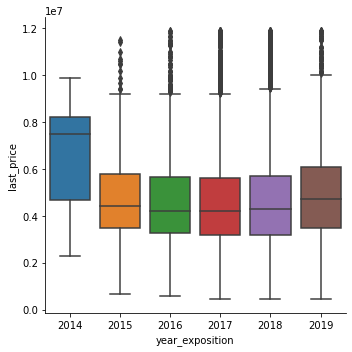

In [65]:
for column in ['rooms', 'floor_category', 'weekday_exposition', 'month_exposition', 'year_exposition']:
    sns.catplot(x=column, y="last_price", kind="box", data=good_data)

Видим четкую зависимость цены от количества комнат, что логично, больше комнат - дороже квартира.

Этажи тоже люди предпочтут средние, ведь первый и последний этаж часто имеет свои характерные проблемы.

День недели никак не влияет

Месяц апрель только слегка выдает себя, возможно в этот месяц люди возвращаются с зимовок и ищут жилье. Более высокий спрос рождает повышенную цену.

2014 год показывает хороший рост цен, возможно причина была резкий скачок валюты, далее последовал переизбыток объявлений и скорее всего демпинг цен с последующей нормализацией. (интересно посмотреть что после 2019)

In [66]:
data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.00,0.65,0.36,-0.21
total_area,0.65,1.00,0.76,-0.23
rooms,0.36,0.76,1.00,-0.18
cityCenters_nearest,-0.21,-0.23,-0.18,1.00


Цена зависит от общей площади, от комнат немного, ну и от города чем дальше тем дешевле

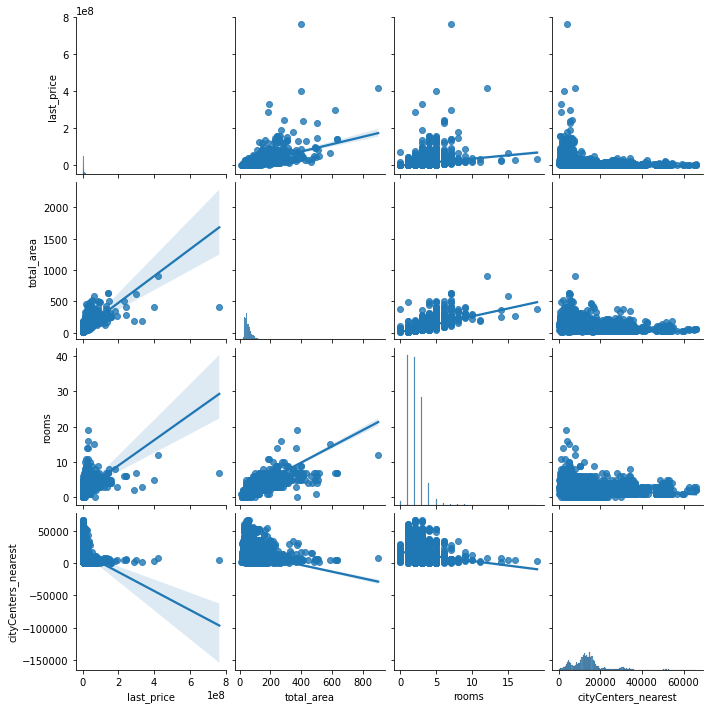

In [67]:
sns.pairplot(data, vars=['last_price', 'total_area', 'rooms', 'cityCenters_nearest'], kind="reg")

<b>"Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра."</b>

In [68]:
#Найдем города где больше всего объявлений
city_price_for_sqm = good_data.pivot_table(index='locality_name', values='price_for_square_meter', aggfunc=['count', 'median'])
city_price_for_sqm.columns = ['count', 'median']
city_price_for_sqm.sort_values('count', ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,11277,101580.14
Мурино,425,85657.14
Шушары,359,76666.67
Всеволожск,340,65538.63
Колпино,304,74421.54
Пушкин,289,98039.22
Гатчина,264,67180.71
Кудрово,219,92800.00
Парголово,218,88702.12


Из самых топ популярных мест по выборке дороже всего в Санкт-Петербурге, Пушкине и Кудрово.

Замыкают топ Гатчина, Всеволожск и Выборг. 

In [69]:
#Самые дорогие
city_price_for_sqm.sort_values('median', ascending=False).head()

,count,median
locality_name,,
Лисий Нос,2,113728.35
Санкт-Петербург,11277,101580.14
Сестрорецк,135,101291.51
Зеленогорск,21,100000.00
Кудрово,139,99740.93


In [70]:
#Самые дешевые
city_price_for_sqm.sort_values('median', ascending=True).head()

,count,median
locality_name,,
Старополье,3,11000.00
станции Свирь,2,11481.48
Вахнова Кара,1,11688.31
Выскатка,2,12335.48
Совхозный,2,12629.13


<b>Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.</b>

In [71]:
spb_good_data = good_data.query('locality_name == "Санкт-Петербург"').round()
spb_pivot = spb_good_data.pivot_table(index='cityCenters_nearest_in_km', values=['last_price'], aggfunc='median')
spb_pivot

,last_price
cityCenters_nearest_in_km,
0.00,7050000.00
1.00,7970000.00
2.00,7900000.00
3.00,6800000.00
4.00,7000000.00
5.00,7100000.00
6.00,6550000.00
7.00,6200000.00
8.00,6010841.50


<AxesSubplot:xlabel='cityCenters_nearest_in_km'>

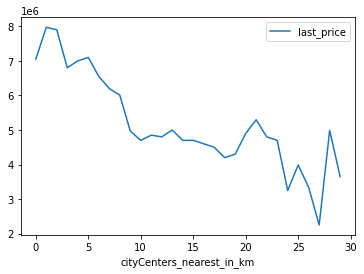

In [72]:
spb_pivot.plot(y='last_price')

Средняя цена каждого километра определена в сводной таблице.


На графике зависимость удаленности от центра к цене. Видим что чем дальше находится объект продажи, тем цена ниже.

### Общий вывод

Получив очень "сырой" датафрейм, с множеством пропусков, аномалий и других неизвестностей, нам удалось очистить его от ненужных элементов, заполнить некоторые пропуски, отформатировать нужные данные и привести его в подобающий вид, отфильтровав аномальные значения.

На рыночную стоимость объекта влияют множество факторов:
- Расстояние от центра города до объекта, его расположение.
- Размер населенного пункта.
- Внешние факторы, экономика.
- Размеры, площадь, объекта.

Стоит учитывать аномалии:
- Объявления могут исчезать из-за автоматизации работы ресурса.
- Человеческий фактор при заполнении анкеты объявления.

Нам удалось:
- Определить цену квадратного метра.
- Заполнить пропуски в данных, где было возможно.
- Определить аномалии и избавиться от них.
- Определить выбросы, произвести фильтрацию.
- Дать ответы на заданные вопросы и задания.

Средняя стоимость квартиры в предоставленных данных составила 4650000 рублей.

Средние цены в Санкт-Петербурге варьируются от 7970000 до 2250000 в зависимости от расположения, площади, дома.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод